In [1]:
import tensorflow as tf
import numpy as np
import cPickle
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import dataset_class as dataset

In [2]:
# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 1
display_step = 10

logs_path = "/tmp/tensorflow/log"    

# Network Parameters
n_input = 1 
n_steps = 1 
n_hidden = 1 

In [3]:
data = pd.read_csv("./data/project02_task2.csv")

In [4]:
# Helper functions
def weight_variable(shape, varName):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial, name=varName)

def bias_variable(shape, varName):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial, name=varName)

In [5]:
# tf Graph input
with tf.name_scope("input"):
    _x = tf.placeholder("float", [1 , 1], name="x-input")
    _y = tf.placeholder("float", [1, 1], name="y-input")

with tf.name_scope("fc"):
    W = tf.Variable(tf.random_normal([1, 1]), name="weight")
    b = tf.Variable(tf.random_normal([1]), name="bias")

def RNN(x, weights, biases):
    x = tf.split(0, 1, x)
    # Define a lstm cell with tensorflow
    with tf.name_scope("rnn"):
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(1)
        stacked_lstm = tf.nn.rnn_cell.MultiRNNCell([lstm_cell] * 1)

    # Get lstm cell output
    outputs, states = tf.contrib.rnn.rnn.rnn(stacked_lstm, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights) + biases

In [6]:
pred = RNN(_x, W, b)

# Define loss and optimizer
with tf.name_scope("cost"):
    cost = tf.sqrt(tf.reduce_mean(tf.square(tf.sub(_y, pred))))
    
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model

#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
with tf.name_scope("accuracy"):
    accuracy = tf.sub(_y, pred)
    
tf.scalar_summary("cost", cost)
tf.scalar_summary("accuracy", accuracy)
summary_op = tf.merge_all_summaries()

Step:  0  Acc:  [[-1.79782045]]  loss: 1.79782
Step:  10  Acc:  [[-1.77769721]]  loss: 1.7777
Step:  20  Acc:  [[-1.75610721]]  loss: 1.75611
Step:  30  Acc:  [[-1.75814116]]  loss: 1.75814
Step:  40  Acc:  [[-1.78048325]]  loss: 1.78048
Step:  50  Acc:  [[-1.78554642]]  loss: 1.78555
Step:  60  Acc:  [[-1.74133873]]  loss: 1.74134
Step:  70  Acc:  [[-1.66548395]]  loss: 1.66548
Step:  80  Acc:  [[-1.61941755]]  loss: 1.61942
Step:  90  Acc:  [[-1.64847386]]  loss: 1.64847
Step:  100  Acc:  [[-1.72608745]]  loss: 1.72609
Step:  110  Acc:  [[-1.76641417]]  loss: 1.76641
Step:  120  Acc:  [[-1.70463455]]  loss: 1.70463
Step:  130  Acc:  [[-1.56981349]]  loss: 1.56981
Step:  140  Acc:  [[-1.47106218]]  loss: 1.47106
Step:  150  Acc:  [[-1.49781251]]  loss: 1.49781
Step:  160  Acc:  [[-1.62531769]]  loss: 1.62532
Step:  170  Acc:  [[-1.7235651]]  loss: 1.72357
Step:  180  Acc:  [[-1.67414939]]  loss: 1.67415
Step:  190  Acc:  [[-1.49008405]]  loss: 1.49008
Step:  200  Acc:  [[-1.31826675]]

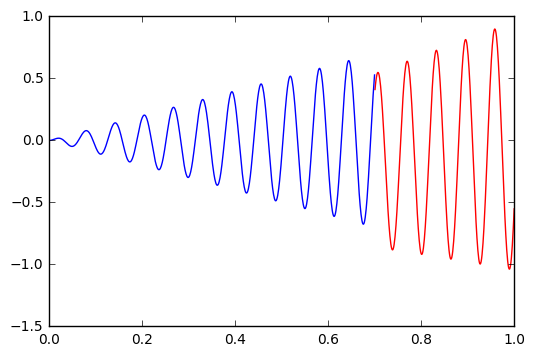

In [7]:


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    train_writer = tf.train.SummaryWriter(logs_path + "/train", sess.graph)
    test_writer = tf.train.SummaryWriter(logs_path + "/test")
    
    step = 0

    # Keep training until reach max iterations
    while step < 700:

        x = data["x"][step]
        x = np.array([[x]])
        
        y = data["y"][step]
        y = np.array([[y]])
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={_x: x, _y: y})
        
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={_x: x, _y: y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={_x: x, _y: y})
            print "Step: ", step, " Acc: ", acc, " loss:", loss
        step += 1
    print "Optimization Finished!"
    
    predY = np.zeros((300))
    
    testLoss = 0
    
    while step < 1000:    
        x = data["x"][step]
        x = np.array([[x]])
        
        y = data["y"][step]
        y = np.array([[y]])
        
        
        
        p = sess.run(accuracy, feed_dict={_x: x, _y: y})
        predY[step - 700] = p
        testLoss +=  (p - y) ** 2
            
        step += 1
        
    print "averag test loss:", testLoss / 300
        
    plt.plot(data["x"][700:], predY, color="red")
    plt.plot(data["x"][:700], data["y"][:700], color="blue")
    
    
    train_writer.close()
    test_writer.close()


In [8]:
data["x"][0

SyntaxError: unexpected EOF while parsing (<ipython-input-8-c22b742591a7>, line 1)